# Studienarbeit

## Maximilian Gaul

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

## Aufgabe 1

#### Laden Sie die Daten aus `adult.data` in einen Pandas DataFrame

In [2]:
hdr = ["age", "workclass", "fnlwgt", "education", "education_num",
       "marital_status", "occupation", "relationship",
      "race", "sex", "capital_gain", "capital_loss",
      "hours_per_week", "native_country", "income"]
df = pd.read_csv("adult.data", skipinitialspace=True,
                 names=hdr
                )

In [3]:
print("LEN:", len(df.index))
df

LEN: 32561


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Aufgabe 2

#### 1) In den nominalen Daten sind noch unbekannte Werte, gekennzeichnet durch `?`, vorhanden. Bereinigen Sie die Daten, indem Sie alle Zeilen entfernen, die unbekannte Werte enthalten.

In [4]:
def query_builder(hdr, val):
    query = ''
    for h in hdr:
        query += '{0} != "{1}" &'.format(str(h), str(val))
    return query[:-1]

df = df.query(query_builder(hdr, "?"), inplace=False)

#### 2) Entfernen Sie die Spalten `fnlwgt` und `income` als Features

In [5]:
X = df.copy()
X = X.drop(columns=["fnlwgt", "income"])
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


#### 3) Als Target soll das Feature `income` dienen, jedoch kommt nicht jeder Algorithmus mit nominalen Features klar. Konvertieren Sie das Target daher, sodass `income` den Wert `1` annimmt, falls das `income` ursprünglich den Wert `>50K` hat und `0` andernfalls

In [6]:
y = pd.DataFrame(
    {"income": np.where(df['income'] == ">50K", 1, 0)}
)
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
30157,0
30158,1
30159,0
30160,0


#### 4) Wieviel Prozent der Personen haben ein Einkommen von mehr als `50.000$`?

In [7]:
total = len(y.index)
rich = len(y.query('income == 1').index)
print(rich / total, "% haben ein Einkommen von mehr als 50.000$")

0.24892248524633645 % haben ein Einkommen von mehr als 50.000$


#### 5) Was ist die Genauigkeit eines naiven Modells, welches unabhängig von den tatsächlichen Features immer weniger als `50.000$` Einkommen zuweist? Dies ist das Mindestmaß an Genauigkeit, an dem sich ihre späteren Modelle messen müssen

In [8]:
tn = total - rich
print("total:", total)
print("tn:", tn)

total: 30162
tn: 22654


Die Genauigkeit ist definiert als $\frac{tp + tn}{tp + tn + fp + fn}$

`tp` ist die Anzahl der Personen, die das Modell als `>50k` einstuft und die auch tatsächlich `>50k` verdienen. Im Fall des naiven Modells ist `tp = 0`.

`tn` ist die Anzahl der Personen, die das Modell als `<=50k` einstuft und die auch tatsächlich `<=50k` verdiene. Im Fall des naiven Modells ist `tn = 22654`.

Der Wert des Nenners `tp + tn + fp + fn` entspricht der Gesamtzahl an Datensätzen.
Damit lässt sich die Genauigkeit berechnen:

$acc = \frac{0 + 22654}{30162} = 0.7511\%$

## Aufgabe 3

#### Schreiben Sie eine Methode `transform(X)` welche einen Feature-Dataframe `X` als Parameter erhält und einen transformierten DataFrame zurückgibt.

Die im Wertebereich verzerrten Features `capital_gain` und `capital_loss` sollten durch Logarithmierung normalisiert werden. Verwenden Sie dafür die Funktion

$$f: \mathbb{R} \rightarrow \mathbb{R}, f(x) = log(x + 1)$$

In [9]:
f = lambda x: np.log(x + 1)

In [10]:
def transform(X):
    _X = X.copy()
    _X["capital_gain"] = _X["capital_gain"].apply(f)
    _X["capital_loss"] = _X["capital_loss"].apply(f)
    
    numeric_headers = [
        "age", "education_num", "capital_gain",
        "capital_loss", "hours_per_week"
    ]
    
    nominal_headers = [
        "workclass", "education", "marital_status",
        "occupation", "relationship",
        "race", "sex", "native_country"
    ]
    
    for nmh in numeric_headers:
        min_max_scaler = preprocessing.MinMaxScaler()
        scaled = min_max_scaler.fit_transform(
            np.array(_X[nmh]).reshape(-1, 1)
        )
        _X[nmh] = scaled
        
    for nmh in nominal_headers:
        dummies = pd.get_dummies(
            data=_X, columns=[nmh]
        )
        _X[nmh] = dummies
    
    return _X

In [11]:
X_trans = transform(X)
X_trans

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.30137,0.30137,0.800000,0.30137,0.30137,0.30137,0.30137,0.30137,0.667492,0.0,0.397959,0.30137
1,0.452055,0.452055,0.452055,0.800000,0.452055,0.452055,0.452055,0.452055,0.452055,0.000000,0.0,0.122449,0.452055
2,0.287671,0.287671,0.287671,0.533333,0.287671,0.287671,0.287671,0.287671,0.287671,0.000000,0.0,0.397959,0.287671
3,0.493151,0.493151,0.493151,0.400000,0.493151,0.493151,0.493151,0.493151,0.493151,0.000000,0.0,0.397959,0.493151
4,0.150685,0.150685,0.150685,0.800000,0.150685,0.150685,0.150685,0.150685,0.150685,0.000000,0.0,0.397959,0.150685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.136986,0.136986,0.733333,0.136986,0.136986,0.136986,0.136986,0.136986,0.000000,0.0,0.377551,0.136986
32557,0.315068,0.315068,0.315068,0.533333,0.315068,0.315068,0.315068,0.315068,0.315068,0.000000,0.0,0.397959,0.315068
32558,0.561644,0.561644,0.561644,0.533333,0.561644,0.561644,0.561644,0.561644,0.561644,0.000000,0.0,0.397959,0.561644
32559,0.068493,0.0684932,0.0684932,0.533333,0.0684932,0.0684932,0.0684932,0.0684932,0.0684932,0.000000,0.0,0.193878,0.0684932


#### Splitten Sie den Datensatz in einen Trainings- und Testdatensatz, wobei der Testdatensatz eine relative Größe von 20% haben soll. Verwenden Sie für die Reproduzierbarkeit einen `random_state = 0`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

## Aufgabe 4

#### Wählen Sie drei verschiedene, in der Vorlesung behandelte Modelltypen und trainieren Sie die entsprechenden Modelle mit den Standardparametern (keine Parameter). Geben Sie zu jedem Modell die Genauigkeit auf dem Testdatensatz aus

In [13]:
def model_to_accuracy(model, X_test, y_test):
    model_predict = model.predict(X_test)
    cf = confusion_matrix(
        y_true=y_test, y_pred=model_predict, labels=[1, 0]
    )

    TP = cf[0][0]
    FN = cf[0][1]
    FP = cf[1][0]
    TN = cf[1][1]

    return (TP + TN) / (TP + TN + FP + FN)

Logistic Regression

In [14]:
lr = LogisticRegression().fit(X_train, y_train.values.ravel())
lr_accuracy = model_to_accuracy(lr, X_test, y_test)
print("Genauigkeit von LogisticRegression:", lr_accuracy)

/usr/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


Genauigkeit von LogisticRegression: 0.7936350074589756


K-Nearest-Neighbors

In [15]:
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
knn_accuracy = model_to_accuracy(knn, X_test, y_test)
print("Genauigkeit KNN:", knn_accuracy)

Genauigkeit KNN: 0.7901541521631029


Support Vector Klassifikation

In [16]:
svc = SVC().fit(X_train, y_train.values.ravel())
svc_accuracy = model_to_accuracy(svc, X_test, y_test)
print("Genauigkeit SVC:", svc_accuracy)

/usr/lib/python3.8/site-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


Genauigkeit SVC: 0.7830266865572684


## Aufgabe 5

#### Wählen Sie das im vorherigen Schritt beste Modell und tunen Sie die Hyperparameter um möglichst eine noch bessere Performance zu bekommen

Das Modell mit der besten Genauigkeit ist das `LogisticRegression`-Modell.

Die Hyperparameter nach der `sklearn`-Dokumentation sind `solver`, `penalty` und `C`. Um die optimale Parameter-Konfiguration zu finden wird für den Parameter `C` eine Rastersuche eingesetzt. Die Parameter `solver` und `penalty` können nur fest vorgegebene Werte annehmen, die ebenfalls durchprobiert werden.

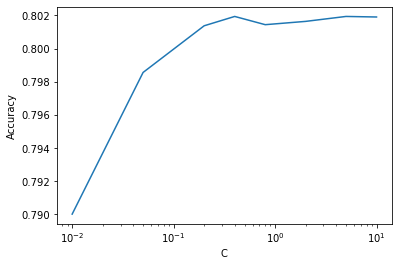

In [17]:
C = [0.01, 0.05, 0.2, 0.4, 0.8, 2.0, 5.0, 10.0]

vals = []
for c in C:
    model = LogisticRegression(C=c, solver="liblinear")
    vals.append(np.average(
        cross_val_score(model, X, y.values.ravel(), cv=5, scoring='accuracy')
    ))

plt.semilogx(C, vals)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

In [18]:
print("Maximale Genauigkeit", np.array(vals).max(), "für C =", C[np.argmax(vals)])

Maximale Genauigkeit 0.8019366990339012 für C = 5.0


Die Genauigkeit verbessert sich also auf 0.8 für `C=5`. Anhand dessen werden die restlichen Hyperparameter getuned.

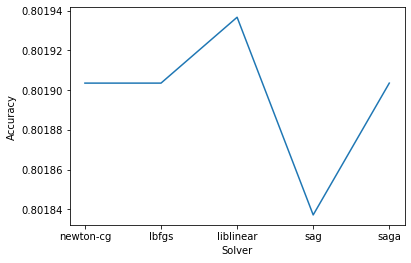

In [19]:
c = 5
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

vals = []
for s in solver:
    model = LogisticRegression(C=c, solver=s)
    vals.append(np.average(
        cross_val_score(model, X, y.values.ravel(), cv=5, scoring='accuracy')
    ))

plt.plot(solver, vals)
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.show()

In [20]:
print("Maximale Genauigkeit", np.array(vals).max(), "für Solver =", solver[np.argmax(vals)])

Maximale Genauigkeit 0.8019366990339012 für Solver = liblinear


Die Genauigkeit hängt nicht wesentlich an der Art des Solvers.

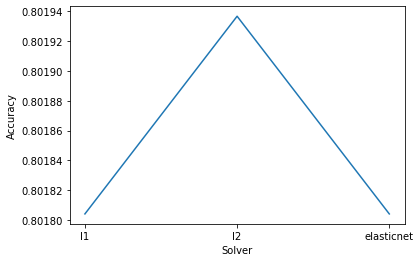

In [21]:
penalties = ["l1", "l2", "elasticnet"]

vals = []
for p in penalties:
    if p == "elasticnet":
        model = LogisticRegression(C=c, penalty=p, solver="saga", l1_ratio=0.5)
    else:
        model = LogisticRegression(C=c, penalty=p, solver="liblinear")
    vals.append(np.average(
        cross_val_score(model, X, y.values.ravel(), cv=5, scoring='accuracy')
    ))
    
plt.plot(penalties, vals)
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.show()

In [22]:
print("Maximale Genauigkeit", np.array(vals).max(), "für Penalty =", penalties[np.argmax(vals)])

Maximale Genauigkeit 0.8019366990339012 für Penalty = l2


Auch hier verbessert sich die Genauigkeit nicht.

## Aufgabe 6

#### Erstellen Sie einen DataFrame mit Werten für eine erfundene Person

In [27]:
person = pd.DataFrame({
    "age": 23,
    "workclass": "Self-emp-inc",
    "education": "Bachelors",
    "education_num": 9,
    "marital_status": "Never-married",
    "occupation": "Tech-support",
    "relationship": "Unmarried",
    "race": "White",
    "sex": "Male",
    "capital_gain": 5,
    "capital_loss": 0,
    "hours_per_week": 20,
    "native_country": "Germany",
    ""
}, index=[0])
person

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,23,Self-emp-inc,Bachelors,9,Never-married,Tech-support,Unmarried,White,Male,5,0,20,Germany


#### Transformieren Sie diese Person ebenfalls mit Hilfe der `transform`-Methode. Da die Normierung nur auf größeren Datensätzen Sinn macht, vereinen Sie den ursprünglichen DataFrame und die neue Person und transformieren das Gesamtpaket

In [ ]:
Xp = pd.concat(())

#### Machen Sie mit Hilfe des Modells eine Vorhersage. Würde die Person als potentieller Spender ausgewählt werden?